In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

from tqdm.notebook import tqdm

%matplotlib inline
%config InlineBackend.figure_formats = ['retina']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['figure.dpi'] = 80
# matplotlib.rcParams['figure.figsize'] = [17, 4]
matplotlib.rcParams['axes.grid'] = True

In [2]:
import sys
sys.path.insert(0, '../')

from lib_data import *
from lib_nn_dpe import NN_dpe

In [20]:
load_workspace(vars(), filename='20200516-163148-cnn-ecc')
load_workspace(vars(), 'data/20190821-051552-mnist_xs')
load_workspace(vars(), 'data/20200130-100802-mnist_config')

Loaded: y1_list, 
Loaded: In, Out, weights, train_images, train_labels, test_images, test_labels, g, img_idx, image, vectors, outputs, software, c, x, y, mat_contents, finalGconv, g1, g2, linear_factors_conv, xs, acc, result, x1, 
Loaded: xs, new_lin_cor_fc1, new_lin_cor_fc2, lin_cor_conv, finalGfc, finalGconv, weights, 


In [7]:
np.array(y1_list).shape

(10000, 400, 15)

In [16]:
from dpeECC import dpeECC
from lib_ecc import *
nn = NN_dpe(weights)

In [14]:
# def correction(y1):
#     # ECC
#     S = (y1 @ G_parity_ecc / nn.Gratio)
#     S = S[:, ::2] - S[:, 1::2]

#     for s, yy in zip(S, y1):
#         ecc_loc, ecc_range = ecc.decode_w_syndrome(s)
        
#         if ecc_loc != -1:
#             if ecc_loc == -2:
#                 # Detected but could not be corrected
# #                 n_detected += 1
#                 pass
#             elif ecc_loc >=0:
#                 # Correct
# #                 n_corrected += 1
#                 yy[ecc_loc] -= (ecc_range[0]+ecc_range[1])/2
#             else:
#                 pass
# #                 n_other += 1
                
#     return y1

# def dense(x):
#     x = x.reshape(20, 20, -1)

#     x1 = nn.relu(x)
#     x1 = nn.max_pooling(x1)
#     x1 = nn.flattern(x1)
#     x1 = np.append(x1, 1)


#     y = x1.T @ finalGfc
#     y = y[::2] - y[1::2]

#     return y.argmax()

In [21]:


cnn_y1_list = y1_list.copy()

delta_list = np.arange(0.02, 0.5, 0.02)
acc_list = []

for delta in tqdm(delta_list):
    
    Delta = 8 * delta
    ecc = dpeECC(nn.Mconv, delta, Delta)

    y_pred = []

    for y1 in tqdm(cnn_y1_list, total=len(test_labels)):
        
        y1 = correct_ecc(y1.copy(), ecc)
        k = nn.Gconv.shape[1] //2

        # Remaining layer
        y_pred.append(dense(y1[:, :k], nn, finalGfc))

    acc = np.mean(y_pred==test_labels)*100
    acc_list.append(acc)
    print(f"delta={delta}, Accuracy={acc:.2f}%")


delta=0.02, Accuracy=90.74%



delta=0.04, Accuracy=91.31%



delta=0.06, Accuracy=92.18%


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




delta=0.1, Accuracy=94.20%


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




delta=0.16, Accuracy=96.56%


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




delta=0.22, Accuracy=96.68%


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




delta=0.28, Accuracy=96.24%



delta=0.30000000000000004, Accuracy=95.83%


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




delta=0.38, Accuracy=93.21%



delta=0.4, Accuracy=92.53%


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




delta=0.48000000000000004, Accuracy=91.40%



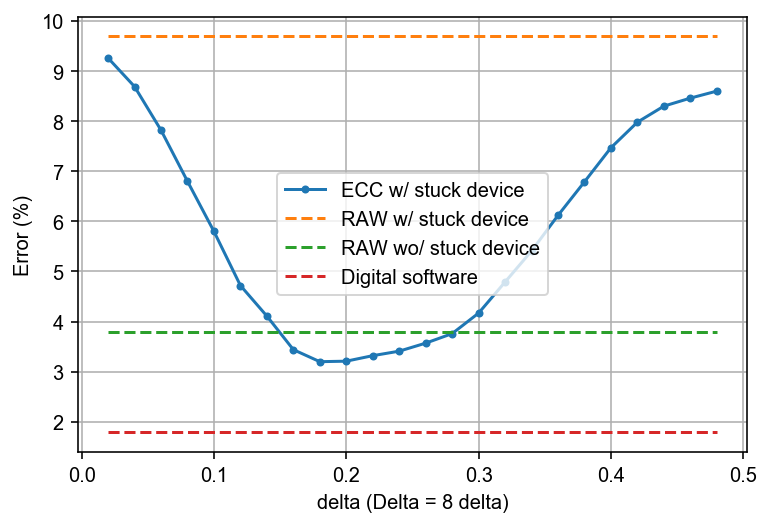

In [22]:
plt.plot(delta_list, [100-acc for acc in acc_list], '.-', label='ECC w/ stuck device')

plt.plot(delta_list, [100-90.31 for _ in delta_list], '--', label='RAW w/ stuck device')
plt.plot(delta_list, [100-96.21 for _ in delta_list], '--', label='RAW wo/ stuck device')
plt.plot(delta_list, [100-98.20 for _ in delta_list], '--', label='Digital software')

plt.xlabel('delta (Delta = 8 delta)')
plt.ylabel('Error (%)')
# plt.yscale('log')
plt.legend()

In [23]:
save_workspace(vars(), note='cnn-accuracy-delta1')

Saving In(<class 'list'>), Out(<class 'dict'>), y1_list(<class 'list'>), cnn_y1_list(<class 'list'>), delta_list(<class 'numpy.ndarray'>), acc_list(<class 'list'>), delta(<class 'numpy.float64'>), Delta(<class 'numpy.float64'>), weights(<class 'numpy.ndarray'>), train_images(<class 'numpy.ndarray'>), train_labels(<class 'numpy.ndarray'>), test_images(<class 'numpy.ndarray'>), test_labels(<class 'numpy.ndarray'>), g(<class 'numpy.ndarray'>), img_idx(<class 'int'>), image(<class 'numpy.ndarray'>), vectors(<class 'numpy.ndarray'>), outputs(<class 'numpy.ndarray'>), software(<class 'numpy.ndarray'>), c(<class 'int'>), x(<class 'numpy.ndarray'>), y(<class 'numpy.ndarray'>), mat_contents(<class 'dict'>), finalGconv(<class 'numpy.ndarray'>), g1(<class 'numpy.ndarray'>), g2(<class 'numpy.ndarray'>), linear_factors_conv(<class 'numpy.ndarray'>), xs(<class 'numpy.ndarray'>), acc(<class 'numpy.float64'>), result(<class 'numpy.ndarray'>), x1(<class 'numpy.ndarray'>), y_pred(<class 'list'>), y1(<cl